In [11]:
result_file = 'result.csv'
model = 'nyc-taxi-green-dec-2016_d10_l451_n901_20240919070555'

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv(result_file)
df = df[df['model'] == model]
df

,model,pruned,predicate,data,scale,threads,time
283,nyc-taxi-green-dec-2016_d10_l451_n901_20240919...,0,0.000000,nyc-taxi-green-dec-2016,1G,2,1.607302
284,nyc-taxi-green-dec-2016_d10_l451_n901_20240919...,1,0.420043,nyc-taxi-green-dec-2016,1G,2,1.511925
285,nyc-taxi-green-dec-2016_d10_l451_n901_20240919...,2,0.420043,nyc-taxi-green-dec-2016,1G,2,1.413206
286,nyc-taxi-green-dec-2016_d10_l451_n901_20240919...,1,0.830135,nyc-taxi-green-dec-2016,1G,2,1.548853
287,nyc-taxi-green-dec-2016_d10_l451_n901_20240919...,2,0.830135,nyc-taxi-green-dec-2016,1G,2,1.437053
288,nyc-taxi-green-dec-2016_d10_l451_n901_20240919...,1,1.240227,nyc-taxi-green-dec-2016,1G,2,1.458071
289,nyc-taxi-green-dec-2016_d10_l451_n901_20240919...,2,1.240227,nyc-taxi-green-dec-2016,1G,2,1.490129
290,nyc-taxi-green-dec-2016_d10_l451_n901_20240919...,1,1.650320,nyc-taxi-green-dec-2016,1G,2,1.328638
291,nyc-taxi-green-dec-2016_d10_l451_n901_20240919...,2,1.650320,nyc-taxi-green-dec-2016,1G,2,1.229188
292,nyc-taxi-green-dec-2016_d10_l451_n901_20240919...,1,2.060412,nyc-taxi-green-dec-2016,1G,2,1.290670


In [13]:
data = df[df['pruned'] == 0]['data'].values[0]
threads = df[df['pruned'] == 0]['threads'].values[0]
scale = df[df['pruned'] == 0]['scale'].values[0]


base_line = df[df['pruned'] == 0]['time'].values[0]
x = df[df['pruned'] == 1]['predicate'].values
y1 = df[df['pruned'] == 1]['time'].values
y2 = df[df['pruned'] == 2]['time'].values

(0.0, 1.6455995988061962)

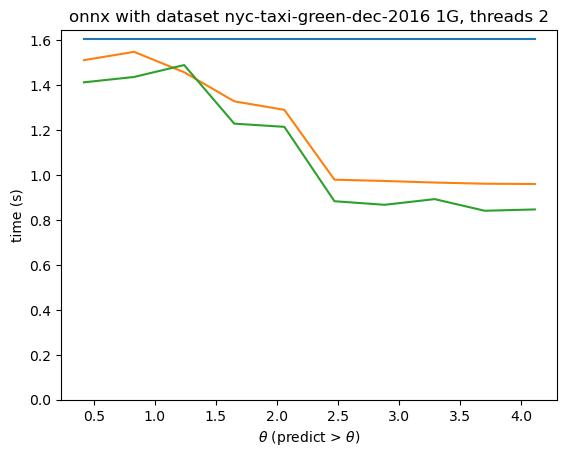

In [14]:
import matplotlib.pyplot as plt

plt.plot(x, [base_line for _ in range(len(x))])
plt.plot(x, y1)
if len(y2) > 0:
    plt.plot(x, y2)
plt.title(f'onnx with dataset {data} {scale}, threads {threads}')
plt.ylabel('time (s)')
plt.xlabel('$\\theta$ (predict > $\\theta$)')
plt.ylim(0)

(0.0, 1.9559170795723697)

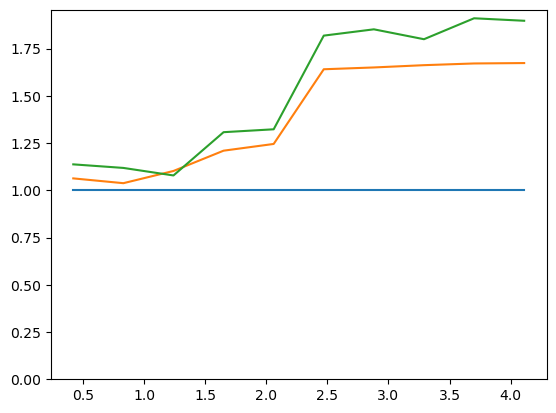

In [15]:
plt.plot(x, [1 for _ in range(len(x))])
plt.plot(x, base_line / y1)
if len(y2) > 0:
    plt.plot(x, base_line / y2)
plt.ylim(0)